In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split,KFold, cross_val_score
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt



In [2]:
#load data 
def load_CKD_data():
   df =pd.read_csv(r'C:\Users\Hiba\Desktop\EC449\Datasets\ckd.csv')
   return df





## Exploaring Dataset 

In [3]:
ckd_data = load_CKD_data()
ckd_data.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
#summurey of each numrical values 
ckd_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
#drop id coulmn there is no need to it 
ckd_data.drop('id', axis = 1, inplace = True)



In [6]:
#Rename Features 

ckd_data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'classification']

ckd_data[1:10]



,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [7]:
ckd_data.drop('potassium', axis = 1, inplace = True)
ckd_data.drop('sodium', axis = 1, inplace = True)
ckd_data.drop('blood_pressure', axis = 1, inplace = True)
ckd_data.drop('sugar', axis = 1, inplace = True)
ckd_data.drop('red_blood_cells', axis = 1, inplace = True)
ckd_data.drop('pus_cell', axis = 1, inplace = True)
ckd_data.drop('pus_cell_clumps', axis = 1, inplace = True)
ckd_data.drop('bacteria', axis = 1, inplace = True)
ckd_data.drop('blood_glucose_random', axis = 1, inplace = True)
ckd_data.drop('blood_urea', axis = 1, inplace = True)
ckd_data.drop('appetite', axis = 1, inplace = True)







In [8]:
ckd_data.drop('coronary_artery_disease', axis = 1, inplace = True)
ckd_data.drop('aanemia', axis = 1, inplace = True)
ckd_data.drop('white_blood_cell_count', axis = 1, inplace = True)
ckd_data.drop('red_blood_cell_count', axis = 1, inplace = True)




In [9]:
ckd_data[1:10]

,age,specific_gravity,albumin,serum_creatinine,haemoglobin,packed_cell_volume,hypertension,diabetes_mellitus,peda_edema,classification
1,7.0,1.020,4.0,0.8,11.3,38,no,no,no,ckd
2,62.0,1.010,2.0,1.8,9.6,31,no,yes,no,ckd
3,48.0,1.005,4.0,3.8,11.2,32,yes,no,yes,ckd
4,51.0,1.010,2.0,1.4,11.6,35,no,no,no,ckd
5,60.0,1.015,3.0,1.1,12.2,39,yes,yes,yes,ckd
6,68.0,1.010,0.0,24.0,12.4,36,no,no,no,ckd
7,24.0,1.015,2.0,1.1,12.4,44,no,yes,yes,ckd
8,52.0,1.015,3.0,1.9,10.8,33,yes,yes,no,ckd
9,53.0,1.020,2.0,7.2,9.5,29,yes,yes,no,ckd


<function matplotlib.pyplot.show(close=None, block=None)>

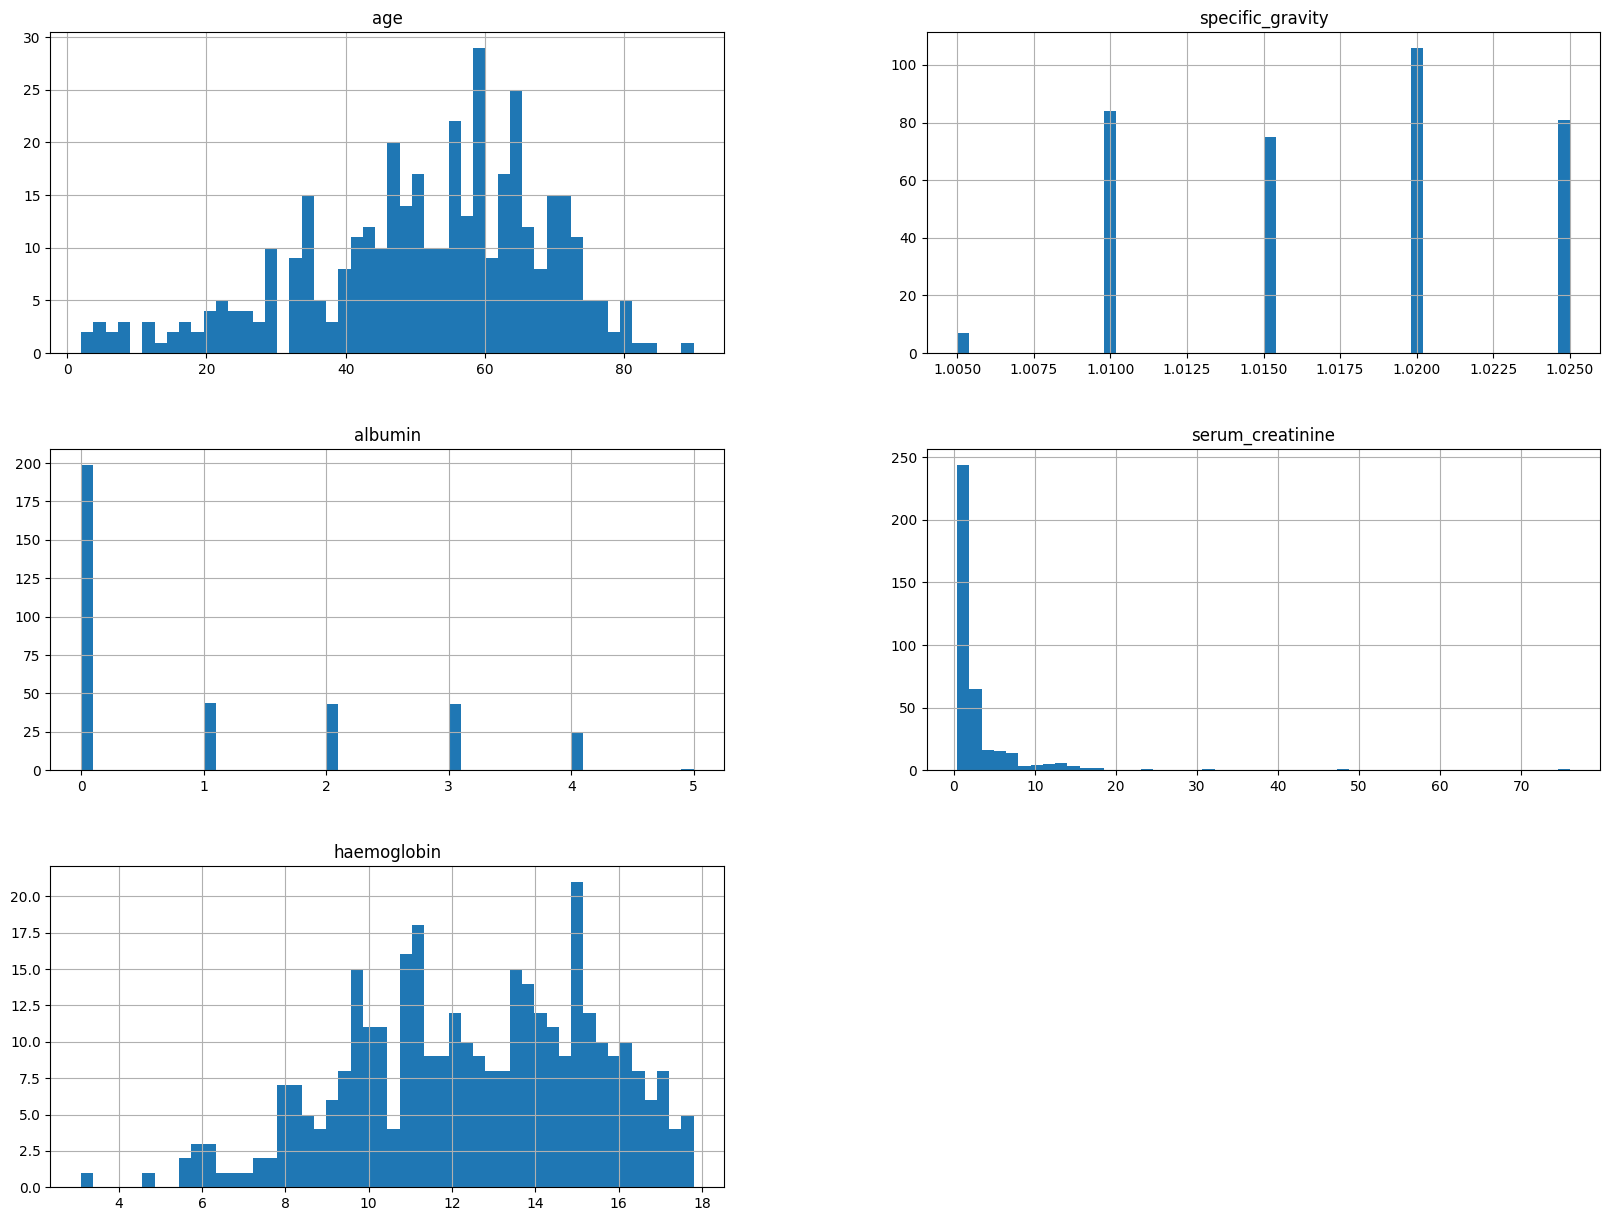

In [10]:
#plot histogram for every attribute 

%matplotlib inline

import matplotlib.pyplot as plt 

ckd_data.hist(bins = 50, figsize=(20,15))
plt.show



In [11]:
#information about datasets as non-null values and datatypes
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 391 non-null    float64
 1   specific_gravity    353 non-null    float64
 2   albumin             354 non-null    float64
 3   serum_creatinine    383 non-null    float64
 4   haemoglobin         348 non-null    float64
 5   packed_cell_volume  330 non-null    object 
 6   hypertension        398 non-null    object 
 7   diabetes_mellitus   398 non-null    object 
 8   peda_edema          399 non-null    object 
 9   classification      400 non-null    object 
dtypes: float64(5), object(5)
memory usage: 31.4+ KB


## Cleaning Data

In [12]:
# #turn some object values into numrical 
# objtonum = ["packed_cell_volume","white_blood_cell_count", "red_blood_cell_count"]
# for i in objtonum:
#     ckd_data[i] = pd.to_numeric(ckd_data[i], errors='coerce')




In [13]:
#put numrical and textual data in diffreant dataframes 

text_ckd = ckd_data.select_dtypes(include=object)
num_ckd = ckd_data.select_dtypes(include= float)       


num_ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               391 non-null    float64
 1   specific_gravity  353 non-null    float64
 2   albumin           354 non-null    float64
 3   serum_creatinine  383 non-null    float64
 4   haemoglobin       348 non-null    float64
dtypes: float64(5)
memory usage: 15.8 KB


In [14]:
#cheak for unique values in cat data 
for col in text_ckd:
   print(f'unique valuse in {col} are {text_ckd[col].unique()}')


unique valuse in packed_cell_volume are ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
unique valuse in hypertension are ['yes' 'no' nan]
unique valuse in diabetes_mellitus are ['yes' 'no' ' yes' '\tno' '\tyes' nan]
unique valuse in peda_edema are ['no' 'yes' nan]
unique valuse in classification are ['ckd' 'ckd\t' 'notckd']


In [15]:
ckd_data["diabetes_mellitus"].replace(to_replace={" yes": "yes", '\tno': "no", "\tyes": "yes"}, inplace = True)
# ckd_data["coronary_artery_disease"].replace(to_replace={'\tno': "no"}, inplace = True)
ckd_data["classification"].replace(to_replace={'notckd': "not ckd","ckd\t": "ckd"}, inplace = True)



In [16]:
#check for unique values in num data 
for col in num_ckd:
   print(f'unique valuse in {col} are {num_ckd[col].unique()}')

unique valuse in age are [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique valuse in specific_gravity are [1.02  1.01  1.005 1.015   nan 1.025]
unique valuse in albumin are [ 1.  4.  2.  3.  0. nan  5.]
unique valuse in serum_creatinine are [ 1.2   0.8   1.8   3.8   1.4   1.1  24.    1.9   7.2   4.    2.7   2.1
  4.6   4.1   9.6   2.2   5.2   1.3   1.6   3.9  76.    7.7    nan  2.4
  7.3   1.5   2.5   2.    3.4   0.7   1.   10.8   6.3   5.9   0.9   3.
  3.25  9.7   6.4   3.2  32.    0.6   6.1   3.3   6.7   8.5   2.8  15.
  2.9   1.7   3.6   5.6   6.5   4.4  10.2  11.5   0.5  12.2   5.3   9.2
 13.8  16.9   6.    7.1  18.    2.3  13.   48.1  14.2  16.4   2.6   7.5
  4.3  18.1  11.8   9.3   6.8  13.5  12.8  11.9  12.   13.

In [17]:
#number of null values in the whole dataset
ckd_data.isnull().sum().sum()

246

In [18]:
#specify input and target and drop id 
inputs = [col for col in ckd_data.columns if col not in ['classification'] ]

target = ["classification"]

In [19]:
# assign X, y to dataframe 
X = ckd_data[inputs]
y = ckd_data[target]

X.head()


,age,specific_gravity,albumin,serum_creatinine,haemoglobin,packed_cell_volume,hypertension,diabetes_mellitus,peda_edema
0,48.0,1.020,1.0,1.2,15.4,44,yes,yes,no
1,7.0,1.020,4.0,0.8,11.3,38,no,no,no
2,62.0,1.010,2.0,1.8,9.6,31,no,yes,no
3,48.0,1.005,4.0,3.8,11.2,32,yes,no,yes
4,51.0,1.010,2.0,1.4,11.6,35,no,no,no


In [20]:
#test/train split 80/20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 240, stratify = y)


In [21]:
fig = px.scatter(ckd_data, x="serum_creatinine", y="haemoglobin", color="classification", template = 'plotly_dark')
fig.show()

In [22]:

TARGET = 'classification'
FEATURES = ckd_data.columns.drop(TARGET)

NUM = ckd_data[FEATURES].select_dtypes('number').columns
print(f"Numerical features: {', '.join(NUM)}")

CAT = pd.Index(np.setdiff1d(FEATURES, NUM))
print(f"Categorical features: {', '.join(CAT)}")

text_ckd = ckd_data.select_dtypes(include=object)
num_ckd = ckd_data.select_dtypes(include= float)       


Numerical features: age, specific_gravity, albumin, serum_creatinine, haemoglobin
Categorical features: diabetes_mellitus, hypertension, packed_cell_volume, peda_edema


In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score



def calculate_roc_auc(model_pipe, X, y):
    """Calculate roc auc score. 
    
    Parameters:
    ===========
    model_pipe: sklearn model or pipeline
    X: features
    y: true target
    """
    y_proba = model_pipe.predict_proba(X)[:,1]
    return roc_auc_score(y, y_proba)
  

In [24]:
def calculate_accuracy(model_pipe, X, y):
    """Calculate roc auc score. 
    
    Parameters:
    ===========
    model_pipe: sklearn model or pipeline
    X: features
    y: true target
    """
    y_proba = model_pipe.predict(X)
    return accuracy_score(y, y_proba)*100

In [25]:
def calculate_k_fold(model_pipe, X, y):
    """Calculate roc auc score. 
    
    Parameters:
    ===========
    model_pipe: sklearn model or pipeline
    X: features
    y: true target
    """
    k_folds = KFold(n_splits = 5)
    scores = cross_val_score(model_pipe, X, y, cv = k_folds)
    return scores.mean()



In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer,IterativeImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib 



from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, classification_report, precision_score, recall_score


def pipeline(classifier, model_name):
    numerical_pipe = Pipeline([
        
    ('imputer', IterativeImputer()),
    ('scaler', MinMaxScaler()),
    
    
])
    categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])
    preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, NUM),
    ('cat', categorical_pipe, CAT)
])
    pipe = Pipeline([
('preprocessors', preprocessors),
('model',classifier
)])

    pipe = pipe.fit(X_train, y_train)
    # joblib.dump(pipe , model_name)
    m_jlib = joblib.load(model_name)
    data = {'age': 48, 'specific_gravity': 1.02, 'albumin':1,
                 'serum_creatinine':0, 
               'haemoglobin':44, 'packed_cell_volume':7800, 
              'hypertension':"yes", 'diabetes_mellitus':"yes", 'peda_edema':"no"}
    # c = [48,80,1.02,1,0,0,"normal","notpresent","notpresent",121,36,1.2,0,0,15.4,44,7800,5.2,"yes","yes","no","good","no","no"]

    df = pd.DataFrame(data,index = [0])

    print(f"this is the prediction of {model_name} Classifier {pipe.predict((df))}")



    return print(f" for  {classifier }& {calculate_accuracy(pipe, X_test, y_test):.4f}\% &  {calculate_roc_auc(pipe, X_test, y_test):.4f} & Classification Report :- \n {classification_report(y_test, pipe.predict(X_test))}")
    # print(f"Test Accuracy: {calculate_accuracy(pipe, X_test, y_test):.9f}")
    # print(f"Train ROC-AUC: {calculate_roc_auc(pipe, X_train, y_train):.4f}")
    # print(f"Test ROC-AUC: {calculate_roc_auc(pipe, X_test, y_test):.4f}")
    #print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")




In [43]:
Algoritms = [DecisionTreeClassifier(),ExtraTreesClassifier(), GradientBoostingClassifier(),SVC(probability=True), RandomForestClassifier(),  GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)]
model_name = ["decision_tree_jlib","extra_tree_model_jlib", "gradient_boosting_model_jlib","svc_model_jlib", "random_forest_model_jlib",  "stochastic_gradient_Boosting_model_jlib"]

for i, Algo in enumerate(Algoritms):
    {pipeline(Algo, model_name[i])}
   
    
    

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



this is the prediction of decision_tree_jlib Classifier ['ckd']
 for  DecisionTreeClassifier()& 97.5000\% &  0.9733 & Classification Report :- 
               precision    recall  f1-score   support

         ckd       0.98      0.98      0.98        50
     not ckd       0.97      0.97      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

this is the prediction of extra_tree_model_jlib Classifier ['ckd']
 for  ExtraTreesClassifier()& 96.2500\% &  0.9967 & Classification Report :- 
               precision    recall  f1-score   support

         ckd       0.98      0.96      0.97        50
     not ckd       0.94      0.97      0.95        30

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

this is the prediction of gradient_boosting_model_jlib Classifier ['ckd']
 for  GradientBoostingClassifier()& 96.2500\% &  0.9973 & Classification Report :- 
               precision    recall  f1-score   support

         ckd       0.98      0.96      0.97        50
     not ckd       0.94      0.97      0.95        30

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80

this is the prediction of svc_model_jlib Classifier ['ckd']
 for  SVC(probability=True)& 95.0000\% &  0.9940 & Classification Report :- 
               precision    recall  f1-score   support

         ckd       0.96      0.96      0.96        50
     not ckd       0.93      0.93      0.93        30

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



c:\Python39\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



this is the prediction of random_forest_model_jlib Classifier ['ckd']
 for  RandomForestClassifier()& 98.7500\% &  1.0000 & Classification Report :- 
               precision    recall  f1-score   support

         ckd       0.98      1.00      0.99        50
     not ckd       1.00      0.97      0.98        30

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

this is the prediction of stochastic_gradient_Boosting_model_jlib Classifier ['ckd']
 for  GradientBoostingClassifier(max_depth=4, max_features=0.75, n_estimators=200,
                           subsample=0.9)& 97.5000\% &  0.9980 & Classification Report :- 
               precision    recall  f1-score   support

         ckd       0.98      0.98      0.98        50
     not ckd       0.97      0.97      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97 

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros



## Pre-processing Data

In [27]:

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=8)

imputer.fit_transform(ckd_data[num_ckd.columns])


array([[48.   ,  1.02 ,  1.   ,  1.2  , 15.4  , 44.   ],
       [ 7.   ,  1.02 ,  4.   ,  0.8  , 11.3  , 38.   ],
       [62.   ,  1.01 ,  2.   ,  1.8  ,  9.6  , 31.   ],
       ...,
       [12.   ,  1.02 ,  0.   ,  0.6  , 15.8  , 49.   ],
       [17.   ,  1.025,  0.   ,  1.   , 14.2  , 51.   ],
       [58.   ,  1.025,  0.   ,  1.1  , 15.8  , 53.   ]])

#dealing with missing values 
# 2. Replacing Null values with mean 
for col in num_ckd:
    ckd_data[col] = ckd_data[col].fillna(value = ckd_data[col].mean())


In [28]:
#Feature encoding 
# 1. one label encoding????
for col in text_ckd:
    ckd_data[col] = ckd_data[col].astype("category").cat.codes



## Machine Learning

In [29]:
#specify input and target and drop id 
inputs = [col for col in ckd_data.columns if col not in ['classification'] ]

target = ["classification"]


In [30]:
# assign X, y to dataframe 
X = ckd_data[inputs]
y = ckd_data[target]

X.head()


,age,specific_gravity,albumin,serum_creatinine,haemoglobin,packed_cell_volume,hypertension,diabetes_mellitus,appetite,peda_edema
0,48.0,1.020,1.0,1.2,15.4,44.0,1,1,0,0
1,7.0,1.020,4.0,0.8,11.3,38.0,0,0,0,0
2,62.0,1.010,2.0,1.8,9.6,31.0,0,1,1,0
3,48.0,1.005,4.0,3.8,11.2,32.0,1,0,1,1
4,51.0,1.010,2.0,1.4,11.6,35.0,0,0,0,0


In [31]:
#test/train split 80/20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 240, stratify = y)



In [32]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.8
Test Accuracy of KNN is 0.7625 

Confusion Matrix :- 
[[33 17]
 [ 2 28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.66      0.78        50
           1       0.62      0.93      0.75        30

    accuracy                           0.76        80
   macro avg       0.78      0.80      0.76        80
weighted avg       0.82      0.76      0.77        80

